In [26]:
#import libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import seaborn as sb
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

In [70]:
#read data
df = pd.read_csv('alllistings - fixed (2).csv')
df

,Address,List/Rent Price,Region,BR,BTH
0,7.5 LOMBARD CLOSE,527587.0,6,3.0,2.0
1,LOT #17 MAVERLEY MOUNTAI...,6000000.0,100,NaN,NaN
2,LOT #18 MAVERLEY MOUNTAI...,6500000.0,100,NaN,NaN
3,LOT #12 MAVERLEY MOUNTAI...,7500000.0,100,NaN,NaN
4,Lot 92 COOPERS HILL DRIVE,7500000.0,100,NaN,NaN
...,...,...,...,...,...
1894,5 WASHINGTON DRIVE,73000000.0,10,5.0,4.0
1895,13 MAYFAIR,70238363.0,19,5.0,5.0
1896,"TORONTO AVENUE,",85000000.0,10,24.0,36.0
1897,7 WATERLOO AVENUE,196788516.0,10,4.0,3.0


In [71]:
#rename columns
df = df.rename(columns = {'List/Rent Price': 'price'})

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  1898 non-null   object 
 1   price    1897 non-null   float64
 2   Region   1898 non-null   object 
 3   BR       1620 non-null   float64
 4   BTH      1717 non-null   float64
dtypes: float64(3), object(2)
memory usage: 74.3+ KB


In [73]:
df = df.dropna(how='any')
df

,Address,price,Region,BR,BTH
0,7.5 LOMBARD CLOSE,527587.0,6,3.0,2.0
8,221 RUBY WAY,8500000.0,13,1.0,2.0
10,GOLDEN SPRING/MT FRIEND,9000000.0,9,5.0,2.0
18,10-1A DUQUESNAY AVE,10500000.0,10,1.0,1.0
19,APT5-21 MERRICK HIGHWAY,10800000.0,19,1.0,1.0
...,...,...,...,...,...
1894,5 WASHINGTON DRIVE,73000000.0,10,5.0,4.0
1895,13 MAYFAIR,70238363.0,19,5.0,5.0
1896,"TORONTO AVENUE,",85000000.0,10,24.0,36.0
1897,7 WATERLOO AVENUE,196788516.0,10,4.0,3.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  1085 non-null   object 
 1   price    1085 non-null   float64
 2   Region   1085 non-null   object 
 3   BR       1085 non-null   float64
 4   BTH      1085 non-null   float64
dtypes: float64(3), object(2)
memory usage: 50.9+ KB


In [74]:
df['Region'] = df['Region'].astype('float')
df

,Address,price,Region,BR,BTH
0,7.5 LOMBARD CLOSE,527587.0,6.0,3.0,2.0
8,221 RUBY WAY,8500000.0,13.0,1.0,2.0
10,GOLDEN SPRING/MT FRIEND,9000000.0,9.0,5.0,2.0
18,10-1A DUQUESNAY AVE,10500000.0,10.0,1.0,1.0
19,APT5-21 MERRICK HIGHWAY,10800000.0,19.0,1.0,1.0
...,...,...,...,...,...
1894,5 WASHINGTON DRIVE,73000000.0,10.0,5.0,4.0
1895,13 MAYFAIR,70238363.0,19.0,5.0,5.0
1896,"TORONTO AVENUE,",85000000.0,10.0,24.0,36.0
1897,7 WATERLOO AVENUE,196788516.0,10.0,4.0,3.0


In [75]:
df.describe()

,price,Region,BR,BTH
count,1.617000e+03,1617.000000,1617.000000,1617.000000
mean,4.436338e+07,14.080396,3.071119,2.648114
std,2.452168e+08,11.462367,2.066173,1.792237
min,1.300000e+05,3.000000,1.000000,1.000000
25%,1.300000e+07,8.000000,2.000000,2.000000
50%,1.900000e+07,10.000000,3.000000,2.000000
75%,3.100000e+07,19.000000,4.000000,3.000000
max,6.509159e+09,103.000000,31.000000,36.000000


In [57]:
#create model
df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept', 'Region', 'BR', 'BTH']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     40.73
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           6.13e-25
Time:                        22:14:01   Log-Likelihood:                -21347.
No. Observations:                1085   AIC:                         4.270e+04
Df Residuals:                    1081   BIC:                         4.272e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.06e+07   5.32e+06      1.993      0.047    1.63e+05     2.1e+07
Region     -2.583e+05   1.93e+05     -1.335      0.182   -6.38e+05    1.21e+05
BR          -1.27e+07    2.1e+06     -6.045      0.000   -1.68e+07   -8.58e+06
BTH         2.659e+07   2.56e+06     10.379      0.000    2.16e+07    3.16e+07
==============================================================================
Omnibus:                     2164.740   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3683117.833
Skew:                          15.256   Prob(JB):                         0.00
Kurtosis:                     286.794   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

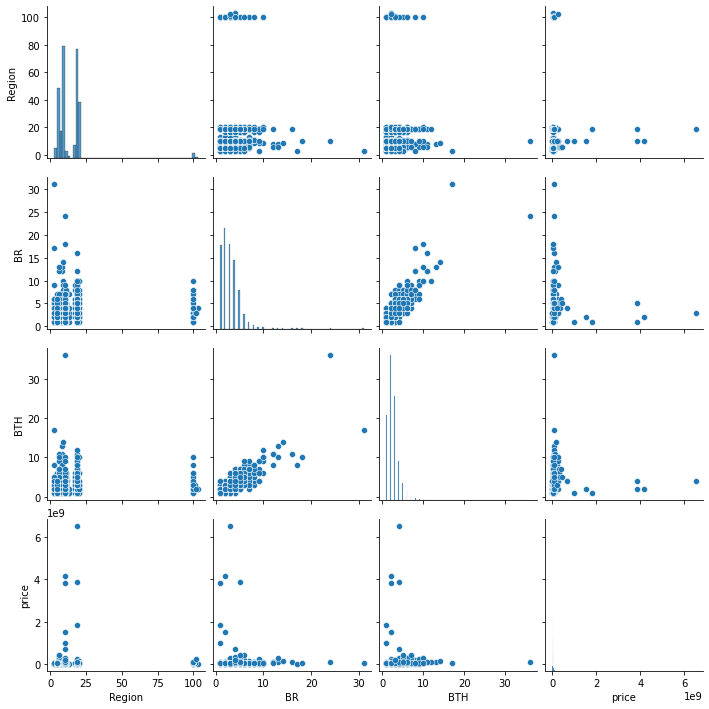

In [76]:
#plot graph to loo for multicollinearity
sb.pairplot(df[['Region', 'BR', 'BTH', 'price']])

I can see slight correlations between some of the variables which need to be further investigated.

### Checking VIF:

In [11]:
#y, x = dmatrices('price_JMD ~  size_sqft + beds + baths', df, return_type = 'dataframe')

In [12]:
'''vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]'''

NameError: name 'x' is not defined

In [ ]:
'''vif['features'] = x.columns
vif'''

Given that the variable of interest have VIFs < 10, I will be ignoring their collinearity.

In [ ]:
#fig = px.scatter(x=df['price'], y=df['Region'], title='House price predictions', labels={'x':'Price in JMD', 'y':'Number of beds'})
#fig.show()

In [ ]:
#beds_np = df['beds'].to_numpy()
#price_np = df['price_JMD'].to_numpy()

In [ ]:
#price_reshaped = price_np.reshape(len(df['price_JMD']), 1)
#price_reshaped

In [ ]:
#model = LinearRegression().fit(price_reshaped, beds_np)
#model.coef_

## Define x and y:

In [77]:
factors = ['Region', 'BR', 'BTH']
x=df[factors].values
y=df['price'].values

In [14]:
print(x)
print(y)

[[ 6.  3.  2.]
 [13.  1.  2.]
 [ 9.  5.  2.]
 ...
 [ 6.  4.  5.]
 [ 6.  6.  7.]
 [ 6.  5.  5.]]
[   527587   8500000   9000000  10500000  10800000  12000000  14000000
  14500000  15000000  15000000  15000000  15000000  15000000  15000000
  16000000  16500000  16800000  16950000  17000000  17000000  17500000
  17500000  18000000  18000000  18000000  18500000  19000000  19250000
  19500000  20000000  20000000  20000000  20000000  20000000  20097400
  20300000  20300000  20500000  20500000  21000000  21000000  21000000
  21500000  21500000  22000000  22000000  22000000  23000000  23000000
  23500000  24000000  24000000  24157000  24551400  24551400  24600000
  24950000  25000000  25000000  25000000  25000000  25500000  25500000
  26000000  26000000  26000000  26000000  26000000  26000000  26000000
  26500000  26800000  26900000  27469000  27469000  27469000  27469000
  27469000  27469000  27469000  27469000  27469000  27469000  27469000
  27469000  27469000  27469000  27469000  27469000  

## Split data into train and test models 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

## Train model

In [79]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

## Predict test results

In [80]:
y_pred = model.predict(x_test)
print(y_pred)

[1.37107143e+07 8.17941176e+06 1.16642857e+07 2.60085333e+07
 3.13609255e+07 1.80794118e+07 9.00000000e+07 1.43750000e+07
 1.09820095e+08 3.48523984e+07 2.08241903e+07 8.17941176e+06
 1.95414286e+07 2.68475606e+07 1.16642857e+07 1.28128241e+08
 3.69258622e+08 1.09820095e+08 7.30000000e+07 1.31828694e+08
 1.04754167e+07 1.79681986e+07 3.69258622e+08 2.68475606e+07
 4.05212882e+07 1.04754167e+07 8.17941176e+06 9.22857143e+06
 1.95414286e+07 2.43431170e+07 2.68475606e+07 3.13609255e+07
 3.13000000e+07 3.55671546e+07 2.70285714e+07 1.19250000e+07
 1.32600000e+07 1.31828694e+08 1.09820095e+08 1.09820095e+08
 2.55814264e+07 8.50000000e+07 1.46000000e+07 1.95414286e+07
 1.09820095e+08 3.13609255e+07 1.76000000e+07 7.44354246e+07
 2.55814264e+07 2.68475606e+07 1.50000000e+07 4.47272510e+07
 3.01478213e+08 5.73333333e+07 1.95414286e+07 8.17941176e+06
 3.48523984e+07 1.87333333e+07 4.05212882e+07 8.17941176e+06
 1.27500000e+07 1.60083333e+07 3.80000000e+07 2.26299075e+08
 1.41453333e+07 3.586000

In [81]:
model.predict([[6,3.0,2.0]])

array([527587.])

In [82]:
mean_absolute_error(y_test, y_pred)

30010553.54209559

In [83]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [84]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  32499649
Max leaf nodes: 50  		 Mean Absolute Error:  30635022
Max leaf nodes: 500  		 Mean Absolute Error:  31120841
Max leaf nodes: 5000  		 Mean Absolute Error:  31120841


### Random Forest:

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_test)
mae = mean_absolute_error(y_test, preds)
print(mae)

32950546.295561552


In [87]:
import threading, time

In [92]:
print('Start Program:')
def takenap():
    time.sleep(5)
    for i in range(5,1):
        print(i)
    print('Boom!')
    
threadObj = threading.Thread(target=takenap)
threadObj.start()
print('End program')

Start Program:
End program
Boom!


range(5, 1)
Boom!
